In [14]:
import pandas as pd
import numpy as np
import matplotlib

In [15]:
varE : str = "Consumo Diario Agua"
df = pd.DataFrame( {varE : ["20-30","30-40","40-50","50-60","60-70","70-80"], "f": [1,15,39,32,11,2]})
df[ ["Li","Ls"]] = df[varE].str.split("-",expand=True).astype("int")
df["Pm"] = (df["Ls"] + df['Li']) / 2
df["F"] = df["f"].cumsum()
df["A"] = df["Ls"] - df["Li"]

print(df)

  Consumo Diario Agua   f  Li  Ls    Pm    F   A
0               20-30   1  20  30  25.0    1  10
1               30-40  15  30  40  35.0   16  10
2               40-50  39  40  50  45.0   55  10
3               50-60  32  50  60  55.0   87  10
4               60-70  11  60  70  65.0   98  10
5               70-80   2  70  80  75.0  100  10


In [16]:
promedio : float = (df["f"]*df["Pm"]).sum() / df["f"].sum()
varianza = (df["f"] * (df['Pm'] - promedio)**2).sum() / (df["f"].sum() - 1)
desviacion = varianza ** 0.5
Cv = (desviacion / promedio)*100

print("Media:", round(promedio,4), "miles de litros")
print("Varianza:",round(varianza,4))
print("Desviacion:",round(desviacion,4),"miles de litros")
print("Coeficiente de Variacion:",round(Cv,4),"%")

Media: 49.3 miles de litros
Varianza: 95.4646
Desviacion: 9.7706 miles de litros
Coeficiente de Variacion: 19.8187 %


<Axes: title={'center': 'Grafico de bastones'}, xlabel='Consumo Diario Agua'>

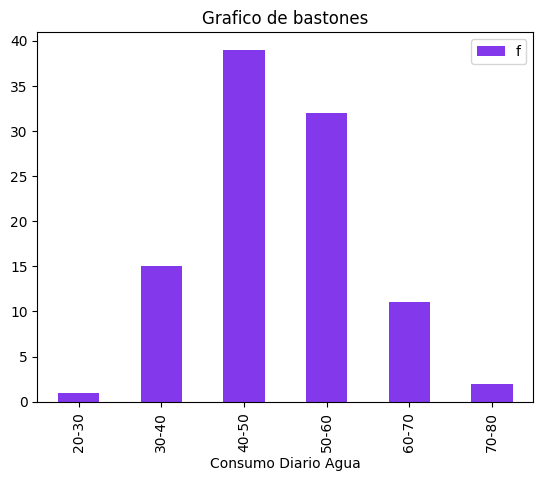

In [17]:
df.plot(kind="bar", x=varE, y="f", title="Grafico de bastones", color="#8338ec")

<Axes: title={'center': 'Grafico Escalonado'}, xlabel='Consumo Diario Agua'>

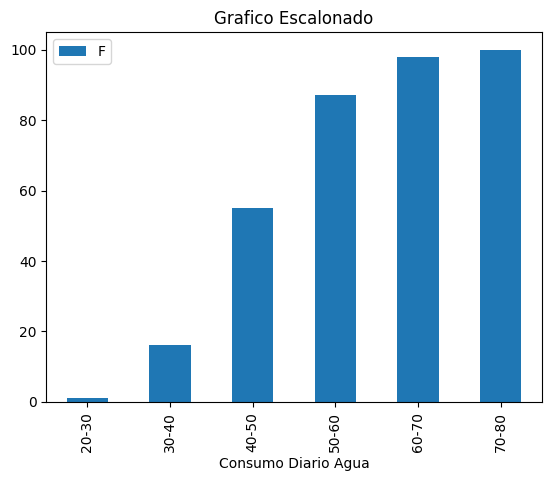

In [18]:
df.plot(kind="bar", x=varE,y="F",title="Grafico Escalonado")

In [19]:
def calcularInverso(valor, df: pd.DataFrame):
    # Buscar el intervalo
    ia = None
    ie = None
    for index, row in df.iterrows():
        if row['Li'] <= valor <= row['Ls']:
            ie = row
            if index != 0:
              ia = df.loc[index-1]['F']
            elif index == 0:
                ia = 0
            break
    final = (valor - ie['Li']) / \
        (ie['Ls'] - ie['Li'])
    final = final * ie['f']
    final = final + ia
    final = final * 100
    final = final / df['F'].max()
    return final

In [20]:
print(f"El {calcularInverso(32,df)}% de los dias tuvo un consumo menor a 32 miles de litros.")
techo = 100 - calcularInverso(51, df)
print(f"El {techo}% tuvo un consumo mayor a 51 miles de litros")

El 4.0% de los dias tuvo un consumo menor a 32 miles de litros.
El 41.8% tuvo un consumo mayor a 51 miles de litros


In [21]:
medio = df["f"].sum() / 2
claseModal = None
claseAnterior = None
for index,row in df.iterrows():
  if row["F"] >= medio:
    claseModal = row
    if index == 0:
      claseAnterior = 0
    else:
      claseAnterior = df.loc[index-1]["F"]
    break

mediana = claseModal["Li"] + (medio - claseModal["F"] + claseModal['f']) / claseModal["f"] * claseModal["A"]
print(f"La mediana es: {mediana} miles de litros")

La mediana es: 48.717948717948715 miles de litros


In [22]:
def calcularPercentil(valor,df):
  percentil_decimal = valor  / 100
  total_frecuencias = df['f'].sum()
  intervalo_percentil = df[df['F'] >= total_frecuencias * percentil_decimal].iloc[0]
  ancho_intervalo = intervalo_percentil["Ls"] - intervalo_percentil["Li"]

  percentil = intervalo_percentil["Li"] + (percentil_decimal * total_frecuencias - intervalo_percentil["F"] 
                                                  + intervalo_percentil['f']) / intervalo_percentil["f"] * ancho_intervalo

  return percentil

In [23]:
print(f"El percentil 10 es {round(calcularPercentil(90, df),4)} miles de litros")
print(f"El percentil 40 es {round(calcularPercentil(60, df),4)} miles de litros")
print(f"El percentil 90 es {round(calcularPercentil(10, df),4)} miles de litros")


El percentil 10 es 62.7273 miles de litros
El percentil 40 es 51.5625 miles de litros
El percentil 90 es 36.0 miles de litros
